In [7]:
from transformers import ViTImageProcessor, ViTForImageClassification
import tkinter as tk
from tkinter import filedialog
from tkinter import*
from PIL import Image,ImageTk
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
def get_hashtag(i_image):
    if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")
        
    image=i_image
    processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    plt.imshow(image)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    lg= outputs.logits
    words_ind = lg.squeeze().argsort(descending=True)[:10]

    words = []
    for idx in words_ind:
        words.append(model.config.id2label[idx.item()])
    words=','.join(words)
    words = words.split(',')
    tags = words[:10]
    h_tags = ['#'+i for i in tags]
    h_tags = ' '.join(h_tags)   
    return h_tags

C:/Users/hp/Machine Learning/Hash Tag_ Generate/Screenshot 2023-02-03 at 3.56.22 PM.png
#beer glass #water jug #water bottle #nipple #beaker #milk can #beer bottle #goblet #coffee mug #bucket


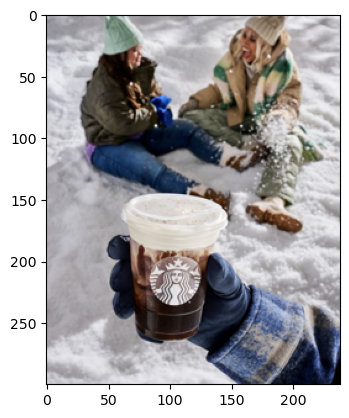

In [11]:
t = tk.Tk()
t.geometry('800x600')
t.title('HashTag Generator')
t.configure(background='#CDCDCD')

txt = tk.Text(t, height=3, width=85, background='#CDCDCD')
txt.configure(font=('Times New Roman', 14))
sign_image = Label(t)

def classify(file_path):
    pred_3 = get_hashtag(file_path)
    print(pred_3)
    #txt.configure(fg='#000', state='normal')
    #txt.delete('1.0', 'end')
    txt.insert('1.0', pred_3)
    #txt.configure(foreground='#000', text= pred_3)
    #txt.configure(state='disabled')
def show_classify_button(file_path):
    classify_b = tk.Button(t, text="Generate Tags", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.7, rely=0.50)

def upload_image():
    try:
        file_path = filedialog.askopenfilename(initialdir="/", title="Choose an image")
        print(file_path)
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((t.winfo_width()/2), (t.winfo_height()/2)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        txt.configure(state='normal')
        txt.delete('1.0', 'end')
        show_classify_button(uploaded)
    except:
        pass

upload = tk.Button(t, text="Upload an image", command=lambda: upload_image(), padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.place(relx=0.08, rely=0.50)

sign_image.pack(side=tk.TOP, expand=True)
txt.place(relx=0.02, rely=0.80)

t.mainloop()
